## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.484860  1.208274  0.974167 -0.735900  0.959824 -1.060642
1 -1.196509  1.220225 -1.113085 -0.018108  1.634016  0.118671
2 -0.673801  0.815523  0.928402  1.302690  1.631502  1.483853
3  0.594909 -0.476996  0.128629  1.128529  1.329991  1.154125
4 -0.865189  0.311407  0.269788 -0.902316  1.021597 -0.786658


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9550290	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9471177	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9385079	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9286904	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9199027	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9122549	total: 72.4ms	remaining: 12s
6:	learn: 0.9024390	total: 72.9ms	remaining: 10.3s
7:	learn: 0.8946443	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8866785	total: 74ms	remaining: 8.15s
9:	learn: 0.8788816	total: 74.6ms	remaining: 7.38s
10:	learn: 0.8723057	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8641662	total: 75.9ms	remaining: 6.25s
12:	learn: 0.8547584	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8481191	total: 76.9ms	remaining: 5.41s
14:	learn: 0.8431369	total: 77.4ms	remaining: 5.08s
15:	learn: 0.8347574	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8265989	total: 78.6ms	remaining: 4.54s
17:	learn: 0.8189348	total: 79ms	remaining: 4.31s
18:	learn: 0.8112707	total: 79.5ms	remaining: 4.11

84:	learn: 0.4721783	total: 110ms	remaining: 1.18s
85:	learn: 0.4693698	total: 111ms	remaining: 1.17s
86:	learn: 0.4655493	total: 111ms	remaining: 1.17s
87:	learn: 0.4614047	total: 112ms	remaining: 1.16s
88:	learn: 0.4575514	total: 112ms	remaining: 1.15s
89:	learn: 0.4544577	total: 112ms	remaining: 1.14s
90:	learn: 0.4504682	total: 113ms	remaining: 1.13s
91:	learn: 0.4469377	total: 113ms	remaining: 1.12s
92:	learn: 0.4434354	total: 114ms	remaining: 1.11s
93:	learn: 0.4398575	total: 114ms	remaining: 1.1s
94:	learn: 0.4369672	total: 115ms	remaining: 1.09s
95:	learn: 0.4334095	total: 115ms	remaining: 1.08s
96:	learn: 0.4311183	total: 115ms	remaining: 1.07s
97:	learn: 0.4277994	total: 116ms	remaining: 1.07s
98:	learn: 0.4250886	total: 116ms	remaining: 1.06s
99:	learn: 0.4217725	total: 117ms	remaining: 1.05s
100:	learn: 0.4189985	total: 118ms	remaining: 1.05s
101:	learn: 0.4159712	total: 118ms	remaining: 1.04s
102:	learn: 0.4127684	total: 118ms	remaining: 1.03s
103:	learn: 0.4099028	total: 

244:	learn: 0.1698023	total: 188ms	remaining: 580ms
245:	learn: 0.1688081	total: 189ms	remaining: 579ms
246:	learn: 0.1677627	total: 189ms	remaining: 577ms
247:	learn: 0.1666461	total: 190ms	remaining: 575ms
248:	learn: 0.1656909	total: 190ms	remaining: 573ms
249:	learn: 0.1647976	total: 190ms	remaining: 571ms
250:	learn: 0.1635354	total: 191ms	remaining: 570ms
251:	learn: 0.1625587	total: 191ms	remaining: 568ms
252:	learn: 0.1615058	total: 192ms	remaining: 566ms
253:	learn: 0.1605080	total: 192ms	remaining: 565ms
254:	learn: 0.1593991	total: 193ms	remaining: 563ms
255:	learn: 0.1583910	total: 193ms	remaining: 562ms
256:	learn: 0.1574568	total: 194ms	remaining: 560ms
257:	learn: 0.1563310	total: 194ms	remaining: 559ms
258:	learn: 0.1556558	total: 195ms	remaining: 557ms
259:	learn: 0.1548270	total: 195ms	remaining: 556ms
260:	learn: 0.1539139	total: 196ms	remaining: 554ms
261:	learn: 0.1526328	total: 196ms	remaining: 553ms
262:	learn: 0.1516947	total: 197ms	remaining: 552ms
263:	learn: 

454:	learn: 0.0553457	total: 294ms	remaining: 353ms
455:	learn: 0.0550380	total: 295ms	remaining: 352ms
456:	learn: 0.0546578	total: 295ms	remaining: 351ms
457:	learn: 0.0544571	total: 296ms	remaining: 350ms
458:	learn: 0.0540856	total: 296ms	remaining: 349ms
459:	learn: 0.0537215	total: 297ms	remaining: 348ms
460:	learn: 0.0533942	total: 297ms	remaining: 347ms
461:	learn: 0.0531025	total: 298ms	remaining: 347ms
462:	learn: 0.0529135	total: 298ms	remaining: 346ms
463:	learn: 0.0526822	total: 299ms	remaining: 345ms
464:	learn: 0.0524841	total: 299ms	remaining: 344ms
465:	learn: 0.0523002	total: 300ms	remaining: 343ms
466:	learn: 0.0519722	total: 300ms	remaining: 343ms
467:	learn: 0.0517372	total: 301ms	remaining: 342ms
468:	learn: 0.0515606	total: 301ms	remaining: 341ms
469:	learn: 0.0513377	total: 302ms	remaining: 340ms
470:	learn: 0.0509983	total: 302ms	remaining: 339ms
471:	learn: 0.0506658	total: 303ms	remaining: 339ms
472:	learn: 0.0503213	total: 303ms	remaining: 338ms
473:	learn: 

606:	learn: 0.0273788	total: 372ms	remaining: 241ms
607:	learn: 0.0272311	total: 373ms	remaining: 240ms
608:	learn: 0.0270854	total: 373ms	remaining: 240ms
609:	learn: 0.0269445	total: 374ms	remaining: 239ms
610:	learn: 0.0268171	total: 374ms	remaining: 238ms
611:	learn: 0.0266993	total: 375ms	remaining: 238ms
612:	learn: 0.0265635	total: 375ms	remaining: 237ms
613:	learn: 0.0264500	total: 376ms	remaining: 236ms
614:	learn: 0.0263062	total: 376ms	remaining: 235ms
615:	learn: 0.0261718	total: 377ms	remaining: 235ms
616:	learn: 0.0260630	total: 377ms	remaining: 234ms
617:	learn: 0.0259387	total: 378ms	remaining: 233ms
618:	learn: 0.0257953	total: 378ms	remaining: 233ms
619:	learn: 0.0256737	total: 379ms	remaining: 232ms
620:	learn: 0.0255766	total: 379ms	remaining: 232ms
621:	learn: 0.0254599	total: 380ms	remaining: 231ms
622:	learn: 0.0253648	total: 380ms	remaining: 230ms
623:	learn: 0.0252569	total: 381ms	remaining: 230ms
624:	learn: 0.0251623	total: 382ms	remaining: 229ms
625:	learn: 

818:	learn: 0.0118826	total: 479ms	remaining: 106ms
819:	learn: 0.0118676	total: 480ms	remaining: 105ms
820:	learn: 0.0118086	total: 480ms	remaining: 105ms
821:	learn: 0.0117853	total: 481ms	remaining: 104ms
822:	learn: 0.0117486	total: 481ms	remaining: 103ms
823:	learn: 0.0117258	total: 481ms	remaining: 103ms
824:	learn: 0.0116670	total: 482ms	remaining: 102ms
825:	learn: 0.0116191	total: 482ms	remaining: 102ms
826:	learn: 0.0115663	total: 483ms	remaining: 101ms
827:	learn: 0.0115104	total: 483ms	remaining: 100ms
828:	learn: 0.0114671	total: 484ms	remaining: 99.8ms
829:	learn: 0.0114320	total: 484ms	remaining: 99.2ms
830:	learn: 0.0113691	total: 485ms	remaining: 98.6ms
831:	learn: 0.0113078	total: 485ms	remaining: 98ms
832:	learn: 0.0112819	total: 486ms	remaining: 97.4ms
833:	learn: 0.0112234	total: 486ms	remaining: 96.8ms
834:	learn: 0.0111980	total: 487ms	remaining: 96.2ms
835:	learn: 0.0111387	total: 487ms	remaining: 95.6ms
836:	learn: 0.0111189	total: 488ms	remaining: 95ms
837:	le

970:	learn: 0.0072547	total: 556ms	remaining: 16.6ms
971:	learn: 0.0072219	total: 557ms	remaining: 16ms
972:	learn: 0.0071945	total: 557ms	remaining: 15.5ms
973:	learn: 0.0071604	total: 558ms	remaining: 14.9ms
974:	learn: 0.0071290	total: 558ms	remaining: 14.3ms
975:	learn: 0.0071026	total: 559ms	remaining: 13.7ms
976:	learn: 0.0070686	total: 559ms	remaining: 13.2ms
977:	learn: 0.0070650	total: 559ms	remaining: 12.6ms
978:	learn: 0.0070615	total: 560ms	remaining: 12ms
979:	learn: 0.0070580	total: 560ms	remaining: 11.4ms
980:	learn: 0.0070280	total: 561ms	remaining: 10.9ms
981:	learn: 0.0070094	total: 561ms	remaining: 10.3ms
982:	learn: 0.0069717	total: 561ms	remaining: 9.71ms
983:	learn: 0.0069468	total: 562ms	remaining: 9.14ms
984:	learn: 0.0069149	total: 562ms	remaining: 8.56ms
985:	learn: 0.0068861	total: 563ms	remaining: 7.99ms
986:	learn: 0.0068516	total: 563ms	remaining: 7.42ms
987:	learn: 0.0068158	total: 564ms	remaining: 6.85ms
988:	learn: 0.0067923	total: 564ms	remaining: 6.28

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

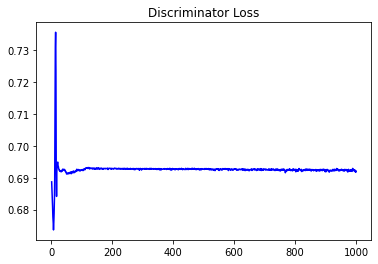

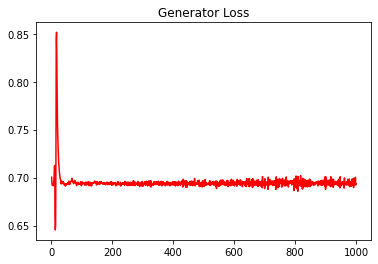

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10742401200735723


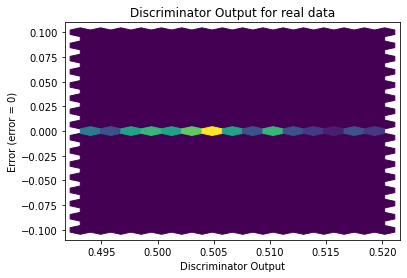

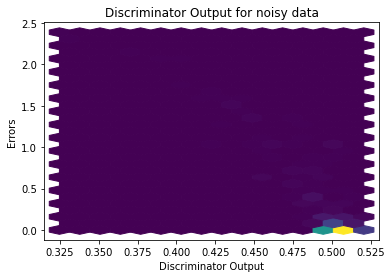

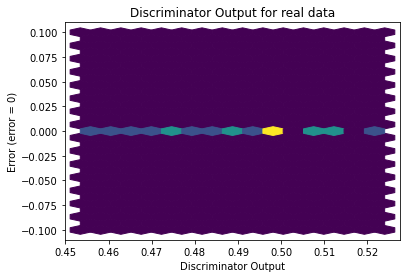

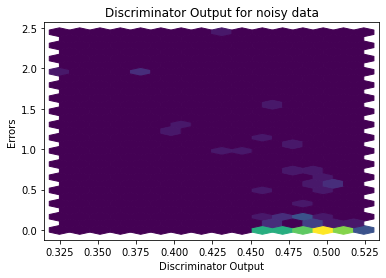

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


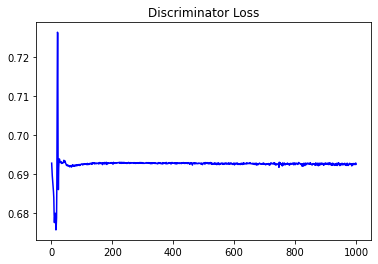

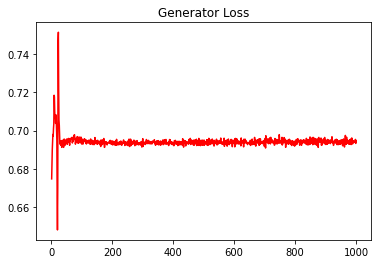

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0918259524315144


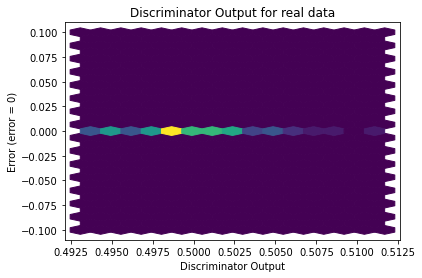

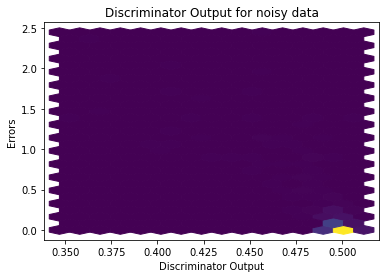

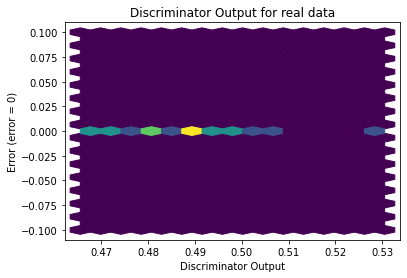

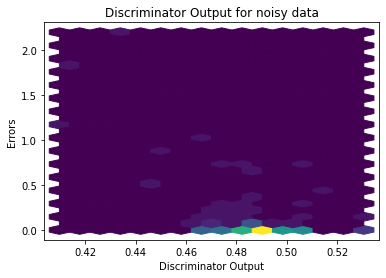

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7533]], requires_grad=True)
